### ref: https://github.com/hunkim/DeepLearningZeroToAll

In [6]:
%matplotlib inline
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


/Users/chaeujeong/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


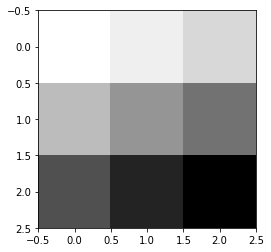

In [9]:
# build a session
sess = tf.InteractiveSession()
# input image data 
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
# image.shape : (# of data, width, height, color)
print(image.shape)
# reshape image data for cnn op
plt.imshow(image.reshape(3,3), cmap='Greys')

## 1 filter (2,2,1,1) woth padding: VALID
#### weight.shape = 1 filter (2,2,1,1)

image.shape :  (1, 3, 3, 1)
weight.shape :  (2, 2, 1, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'numpy.ndarray'>
conv2d_img.shape :  (1, 2, 2, 1)
before swap axes 
 [[[[ 12.]
   [ 16.]]

  [[ 24.]
   [ 28.]]]]
[[ 12.  16.]
 [ 24.  28.]]


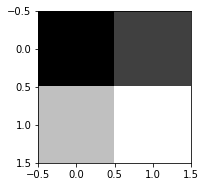

In [28]:
print("image.shape : ", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print("weight.shape : ", weight.shape)

# build a conv
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
# print(type(conv2d)) # : <class 'tensorflow.python.framework.ops.Tensor'>
conv2d_img = conv2d.eval() # eval() ?? : convert tensor to numpy.ndarray, type issue 
# print(type(conv2d_img)) # : <class 'numpy.ndarray'>
print("conv2d_img.shape : ", conv2d_img.shape)

print("before swap axes \n",conv2d_img)


conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

## 1 filter (2,2,1,1) with padding:SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


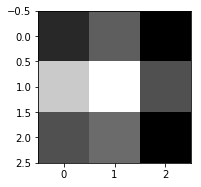

In [34]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()

print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


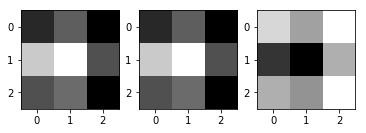

In [37]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()

print("conv2d_img.shape", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
#print(conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### MAX POOLING

In [40]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],
                     strides=[1,1,1,1], padding='VALID')
print(pool)
print(pool.shape)
print(pool.eval())

Tensor("MaxPool_2:0", shape=(1, 1, 1, 1), dtype=float32)
(1, 1, 1, 1)
[[[[ 4.]]]]


### SAME: Zero padding

In [41]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [43]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


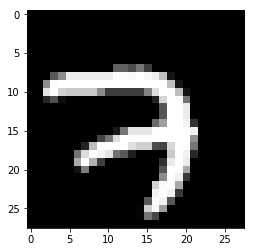

In [44]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

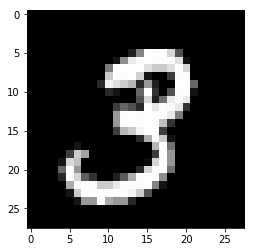

In [45]:
img = mnist.train.images[1].reshape(28,28)
plt.imshow(img, cmap='gray')

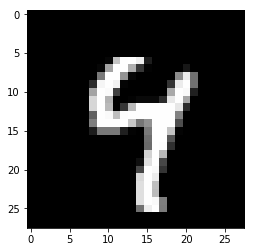

In [48]:
img = mnist.train.images[2].reshape(28,28)
plt.imshow(img, cmap='gray')

/Users/chaeujeong/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_25:0", shape=(1, 14, 14, 5), dtype=float32)


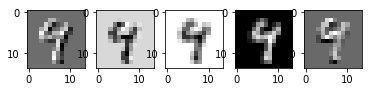

In [49]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1) # (n개, width, height, color(black/white))
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_6:0", shape=(1, 7, 7, 5), dtype=float32)


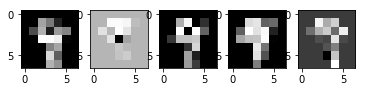

In [52]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')